# Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Importing the Dataset

In [25]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
labelen = LabelEncoder()
dataset['Gender'] = labelen.fit_transform(dataset['Gender'])

In [17]:
dataset.drop('Gender', axis= 1, inplace = True)

# Splitting the Dataset:

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling

In [19]:
sv = StandardScaler()
X_train = sv.fit_transform(X_train)
X_test = sv.transform(X_test)

# Fitting SVM to the Training Set:

In [20]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

# Predicting the Test Set Results:

In [21]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix:

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Visualizing the Training Set Results:

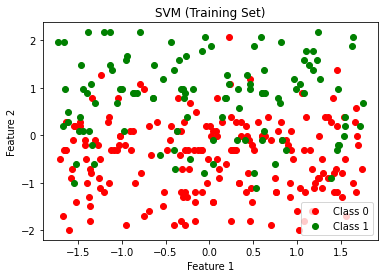

In [34]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='green', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM (Training Set)')
plt.legend()
plt.show()              

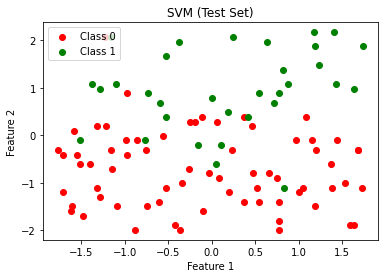

In [35]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='green', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM (Test Set)')
plt.legend()
plt.show()